In [1]:
import pandas as pd
import graphviz
import json
from surrogate.rules import print_decisions

In [2]:
df = pd.read_csv('surrogate_proto.csv')

In [3]:
df.head(5)

,Unnamed: 0,input_query,cf,input_query_nn_pred,cf_nn_pred,permutation_nn_pred_portion,input_query_tree_pred,cf_tree_pred,input_query_decisions,cf_decisions,dot_data,sparsity,distance,depth_diff,has_same_input_pred,has_same_cf_pred,cf_leaf_id,input_query_leaf_id
0,0,"[1.0, 189.0, 56.065574, 23.0, 846.0, 30.1, 0.3...","[4.864439487457275, 77.6102294921875, 56.06557...",0.953594,0.473794,"[542, 549]",[1.],[1.],"[{""node_id"": 0, ""feature_idx"": 1, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 1, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",6,173.446437,0,True,False,20.0,27.0
1,1,"[1.0, 180.0, 0.0, 0.0, 0.0, 43.3, 0.275591, 41.0]","[1.0, 162.397216796875, 0.0, 0.0, 0.0, 22.1855...",0.864986,0.491717,"[529, 564]",[1.],[1.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",3,27.489613,0,True,False,17.0,17.0
2,2,"[8.0, 179.0, 67.278689, 42.0, 130.0, 32.7, 0.7...","[8.0, 89.77251434326172, 67.2786865234375, 45....",0.866738,0.498792,"[542, 555]",[1.],[1.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",5,89.292647,1,True,False,13.0,15.0
3,3,"[8.0, 151.0, 72.885246, 32.0, 210.0, 42.9, 0.5...","[8.0, 98.7505874633789, 72.88524627685547, 32....",0.844363,0.499490,"[550, 547]",[1.],[0.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",5,52.251378,0,True,True,15.0,20.0
4,4,"[11.0, 138.0, 69.147541, 26.0, 144.0, 36.1, 0....","[10.591582298278809, 67.5608139038086, 72.2386...",0.780766,0.495823,"[540, 558]",[1.],[0.],"[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","[{""node_id"": 0, ""feature_idx"": 7, ""feature_nam...","digraph Tree {\nnode [shape=box] ;\n0 [label=""...",6,105.189192,4,True,True,11.0,21.0


[`input_query`] -> Input query for generating counterfactual.

[`cf`] -> Counterfactual found through CounterfactaulProto.

[`input_query_nn_pred`] -> Prediction value for input_query using our model.

[`cf_nn_pred`] -> Predictino value for cf using our model.

[`permutation_nn_pred_portion`] -> The permutation dataset label size for `[0, 1]` # Checking balance.

[`input_query_tree_pred`] -> Prediction value for input_query using surrogate decision tree.

[`cf_tree_pred`] -> Prediction value for cf using surrogate decision tree.

[`input_query_decisions`] -> Rules extracted when predicting input query using surrogate decision tree.

[`cf_decisions`] -> Rules extracted when predicting cf using surrogate decision tree.

[`input_query_leaf_id`] -> decision leaf id for input_query on surrogate decision tree.

[`cf_leaf_id`] -> decision leaf id for cf on surrogate decision tree.

[`dot_data`] -> Dot data to plot the surrogate decision tree. # Example below

[`sparsity`] -> How many features changed.

[`distance`] -> L2 distance btw input_query and counterfactual.

[`depth_diff`] -> Depth difference btw input_query and cf.

[`has_same_input_pred`] -> Our model and surrogate decision tree has same prediction on input_query.

[`has_same_cf_pred`] -> Our model and surrogate decision tree has same prediction on cf.


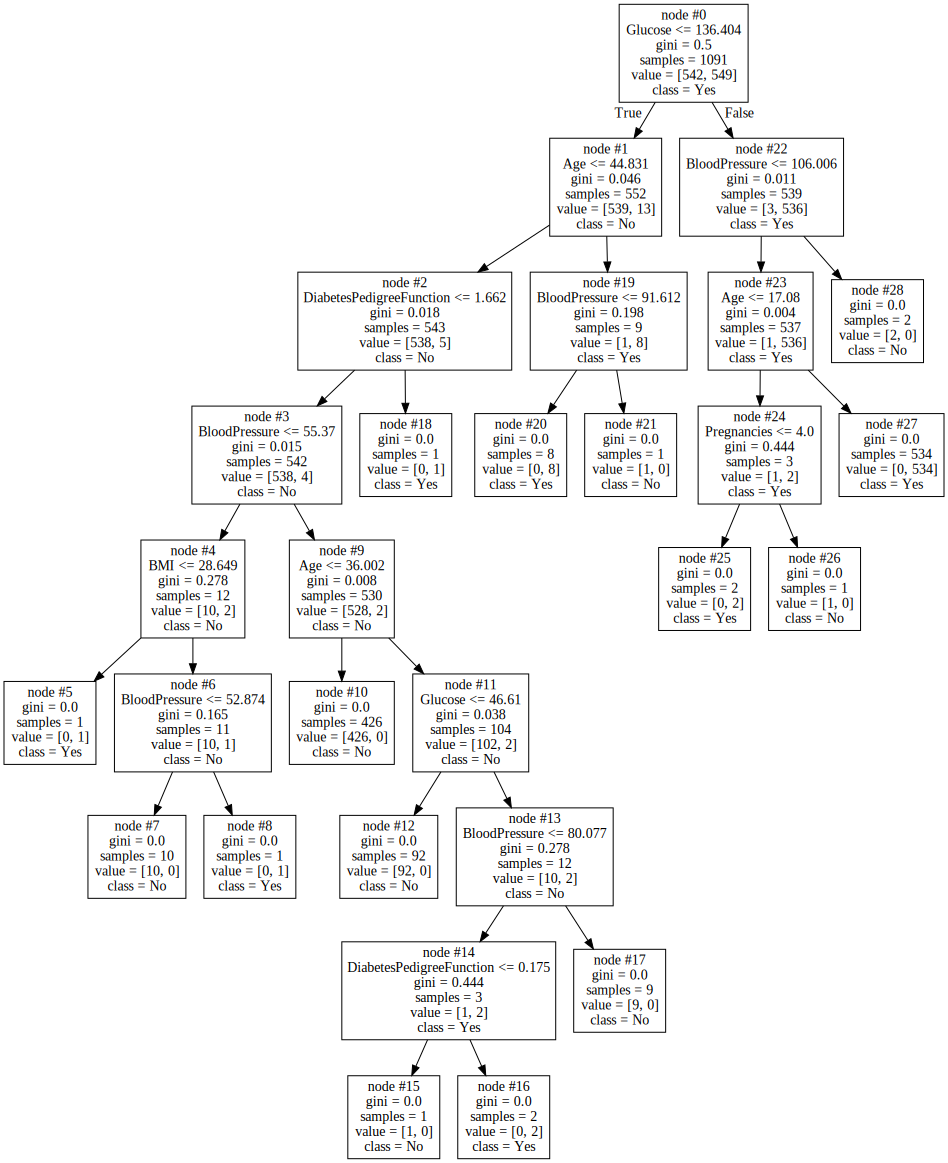

In [4]:
example = df.iloc[0]
graphviz.Source(example['dot_data'], format="png") 

In [5]:
input_query_true = df[df['has_same_input_pred']==True]
input_query_cf_true = input_query_true[input_query_true['has_same_cf_pred']==True]
print(f"In {len(input_query_cf_true) / len(df)} % of the case, the surrogate decision have the same prediction result as our model in input query and its counterfactual.")

In 0.2 % of the case, the surrogate decision have the same prediction result as our model in input query and its counterfactual.


In [6]:
## Print the decision rules for input_query.
print_decisions(json.loads(example['input_query_decisions']))
print(f"End in # {example['input_query_leaf_id']}")

decision node 0 : (x [Glucose] = 189.0) > 136.4044647216797)
decision node 22 : (x [BloodPressure] = 56.065574) <= 106.00564575195312)
decision node 23 : (x [Age] = 59.0) > 17.079580307006836)
End in # 27.0


In [7]:
## Print the decision rules for cf.
print_decisions(json.loads(example['cf_decisions']))
print(f"End in # {example['cf_leaf_id']}")

decision node 0 : (x [Glucose] = 77.6102294921875) <= 136.4044647216797)
decision node 1 : (x [Age] = 59.0) > 44.830915451049805)
decision node 19 : (x [BloodPressure] = 56.065574645996094) <= 91.61150360107422)
End in # 20.0
